In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [3]:
companies_dict = {
    'Boeing': 'BA',
    'General Electric': 'GE',
    'Bank of America': 'BAC',
    'Hertz': 'HTZ',
    'American Express': 'AXP',
    'Toyota': 'TM',
    'Ford': 'F',
    'Microsoft': 'MSFT',
    'Nvidia': 'NVDA'}
companies = sorted(companies_dict.items(), key=lambda x: x[1])

    


In [5]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2017-01-01'
end_date = '2020-10-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'GE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2020-09-18', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25', '2020-09-28', '2020-09-29',
               '2020-09-30', '2020-10-01'],
              dtype='datetime64[ns]', name='Date', length=944, freq=None), MultiIndex([('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'HTZ'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'TM'),
            ('Adj Close',    'F'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close',   'GE'),
            (    'Close',   'BA'),
            (    'Close',  'BAC'),
            (    'Close',  'HTZ'),
            (    'Close',  'AXP'),
            (    'Close',   'TM'),
            (    'Close',    'F'),
         

In [6]:
# Find Stock Open and Close Values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
BA      156.970001
BAC      22.530001
HTZ      19.565596
AXP      75.349998
TM      118.550003
F        12.590000
MSFT     62.580002
NVDA    102.010002
GE             NaN
Name: 2017-01-03 00:00:00, dtype: float64


In [7]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

# create movements dataset filled with 0's
movements = np.zeros([row, col])

for i in range(0, row):
 movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

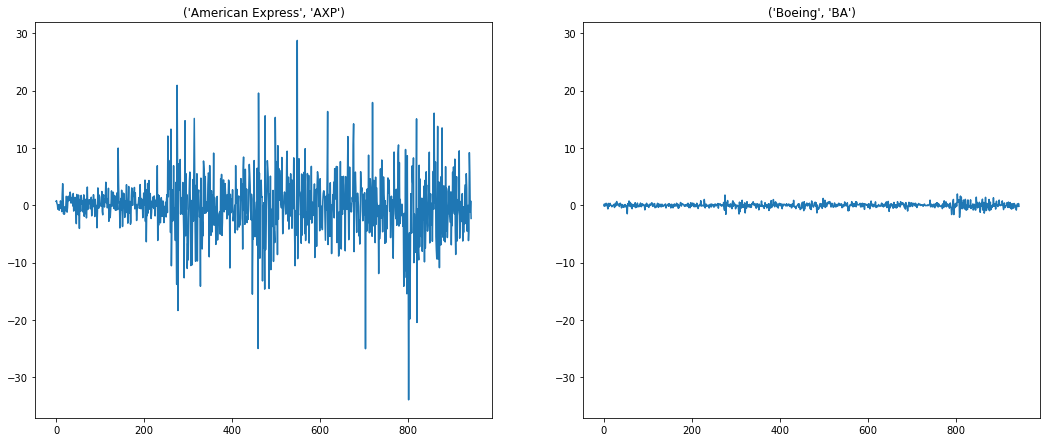

In [8]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [15]:
companies.dropna()

AttributeError: 'list' object has no attribute 'dropna'

In [9]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=4, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

In [ ]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

In [ ]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

In [ ]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

In [ ]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

In [ ]:
plt.figure(figsize=(10,5))
colours = ['r', 'b', 'g', 'c']
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
            color=colours[int(y[i])],
            fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()